Hello, dear reader! This is the second notebook in the Spring 2019 MCFAM math of machine learning seminar at the University of Minnesota. Join us in person in Vincent Hall 301, 1:30-2:30 pm, in February 2019.

This notebook extends discussion of decision trees. We will concentrate on the DecisionTreeClassifier in scikit-learn. What's a decision tree? What are information gain and Gini impurity?

In particular, this notebook will also start a more in-depth discussion of overfitting and parameter tuning. Decision trees are a great place to start because they're relatively easily interpretable, unlike neural networks or even support vector machines, and so we can look more deeply at how overfitting can happen.

Decision trees can be used for classification or regression. We'll start with decision trees for classification -- evaluating the results of a classification model is very easy, while evaluating results of a regression model is marginally more mathematically intensive.

This worksheet is copyleft by Kaisa Taipale, 2019, under the GNU Affero GPL.

In [12]:
# Here I'll show my version of Python and compiler for troubleshooting purposes

import sys
print(sys.version)
print(sys.version_info)
    

3.6.4 |Anaconda, Inc.| (default, Mar 12 2018, 20:05:31) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)


## Load packages and data files

At the top here and in all future notebooks, I'll just have a big cell collecting all the libraries that I want to use in the notebook, as well as code to make images display inline. I'll also load the csv files for the mystery data we'll play with.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

In [14]:
# We'll use the mystery data from last time, which you should have already created decision trees for.

mystery1 = pd.read_csv("mysteryclassification1.csv") # three labels
mystery2 = pd.read_csv("mysteryclassification2.csv") # two labels
mystery3 = pd.read_csv("mysteryclassification3.csv") # two labels

In [15]:
# We'll also use some special mystery data I made just for this session!

## Mystery3, first

First, let's look at the mystery3 data. Did you do this last week? :)

I want to look at mysteryclassification3.csv right away because when I fit a decision tree to this data, I generally get an accuracy score in the low eighty-percent range, rather than above ninety percent. We can compare this to mystery2, which gave us such high accuracy.

In [16]:
# Let's put mystery3 into this X, y format
# Let's put mystery3 into this X, y format
X2 = mystery2[['x','y']]
y2 = mystery2[['label']]

X3 = mystery3[['x','y']]
y3 = mystery3[['label']]

In [17]:
# Make a train-test split using scikit-learn's train_test_split
# This leaves 20% of the data as a test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=13249)


X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=13249)

In [18]:
# create a model called clf using the DecisionTreeClassifier method
clf2 = tree.DecisionTreeClassifier()
# fit the model clf using the training data
clf2 = clf2.fit(X2_train, y2_train)

# create a model called clf using the DecisionTreeClassifier method
clf3 = tree.DecisionTreeClassifier()
# fit the model clf using the training data
clf3 = clf3.fit(X3_train, y3_train)

In [19]:
# predict the labels for y_test given the features of X_test
y2_pred = clf2.predict(X2_test)
y3_pred = clf3.predict(X3_test)

In [20]:
metrics.accuracy_score(y2_test, y2_pred, normalize=True, sample_weight=None)

0.99375

In [21]:
metrics.accuracy_score(y3_test, y3_pred, normalize=True, sample_weight=None)

0.88

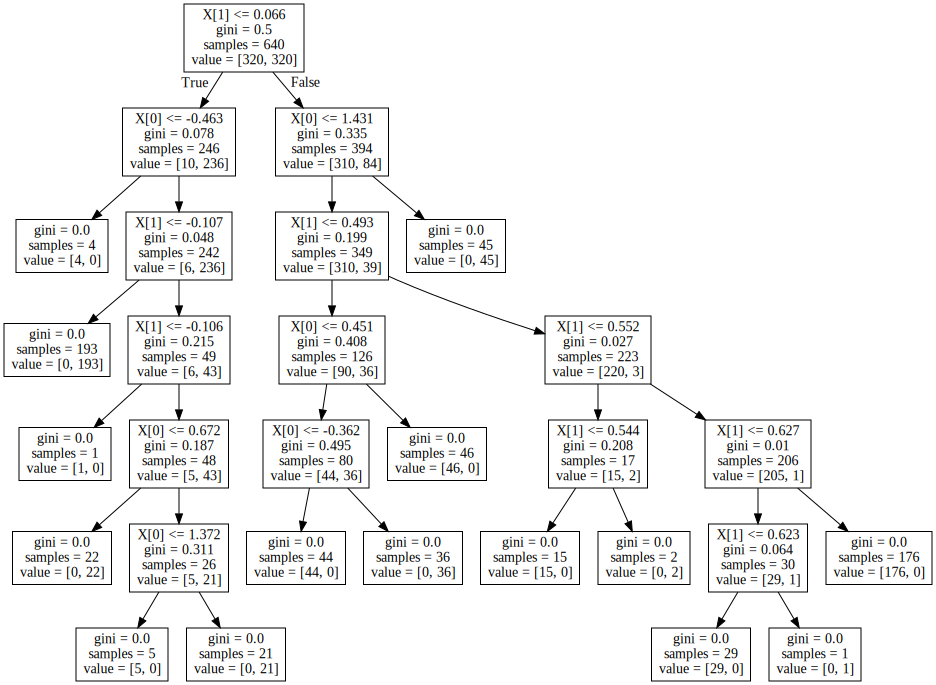

In [22]:
# If you are able to install graphviz, you can visualize the decision tree that you created.
# This is a fun exercise because you can see quickly how ridiculously complex this one is.
# I've been unable to install in Windows,
# and on a Mac with Anaconda, it's important to note that 'conda install graphviz' WON'T HELP
# you must use instead 'conda install python-graphviz'

import graphviz 
dot_data2 = tree.export_graphviz(clf2, out_file=None)
graph2 = graphviz.Source(dot_data2)  
graph2 


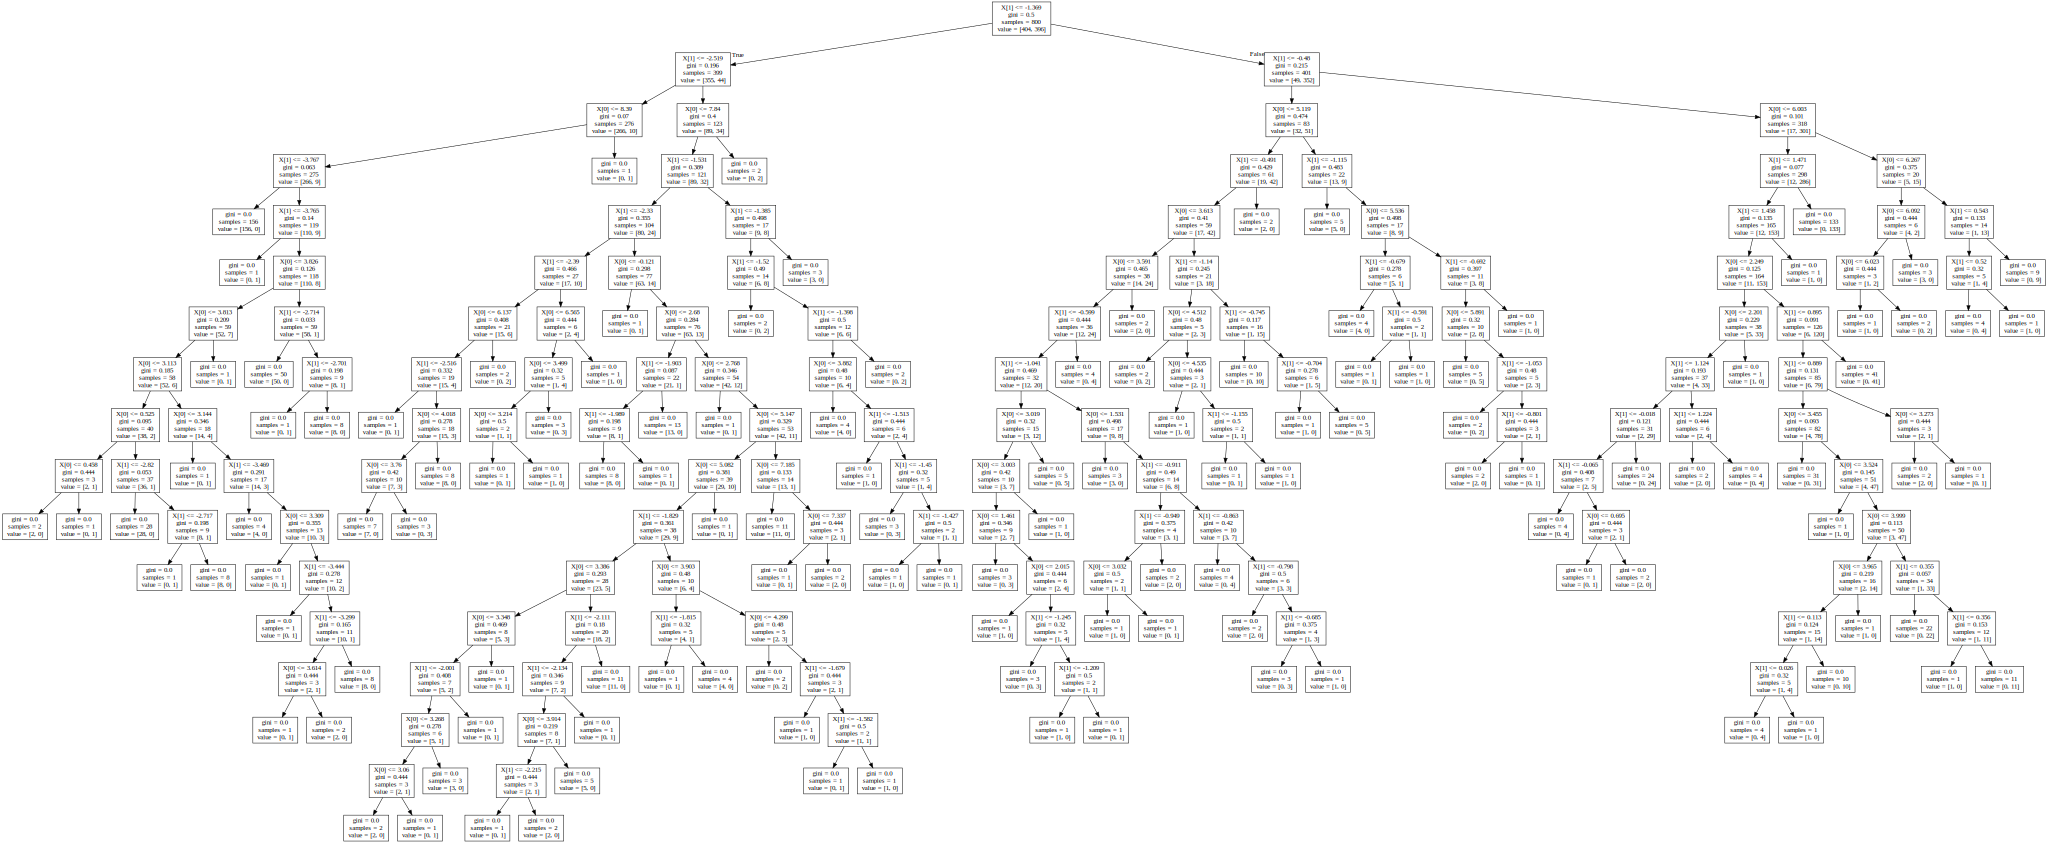

In [23]:
dot_data3 = tree.export_graphviz(clf3, out_file=None)
graph3 = graphviz.Source(dot_data3)  
graph3 


If you don't see anything right above, scroll in that window -- there is a HUGE tree in there.

Look at the top node of the tree. It says that it's splitting on the value of $X[1]$, based on whether $X[1]$ is greater than or equal to -1.369. It also says that there are 800 data points (samples) in the training set and that 404 have label 0 while 396 have label 1.

Every node also says something about the Gini index. We'll talk about that.

Look at the bottom leaves of the tree: there are many leaves that say "samples = 1". This means that the decision tree algorithm went along splitting until it was making very fine-grained distinctions between points.

Question for you: if your algorithm is making very finely-grained decisions like this, how robust is it to outliers? How do you think it's dealing with "mixed-up data"?


In [24]:
# Let's try "entropy" instead of Gini -- any change in results?

# create a model called clf using the DecisionTreeClassifier method
clf = tree.DecisionTreeClassifier(criterion='entropy')
# fit the model clf using the training data
clf2 = clf.fit(X2_train, y2_train)
# fit the model clf using the training data
clf3 = clf.fit(X3_train, y3_train)
y2_pred = clf2.predict(X2_test)
y3_pred = clf3.predict(X3_test)

In [25]:
metrics.accuracy_score(y2_test, y2_pred, normalize=True, sample_weight=None)
# This is so low that I honestly feel I'm making a mistake.

0.4875

In [26]:
metrics.accuracy_score(y3_test, y3_pred, normalize=True, sample_weight=None)
# This by contrast went up a bit!

0.89

Wow. Using entropy or information gain rather than Gini index makes rather a difference. (What do you see?)

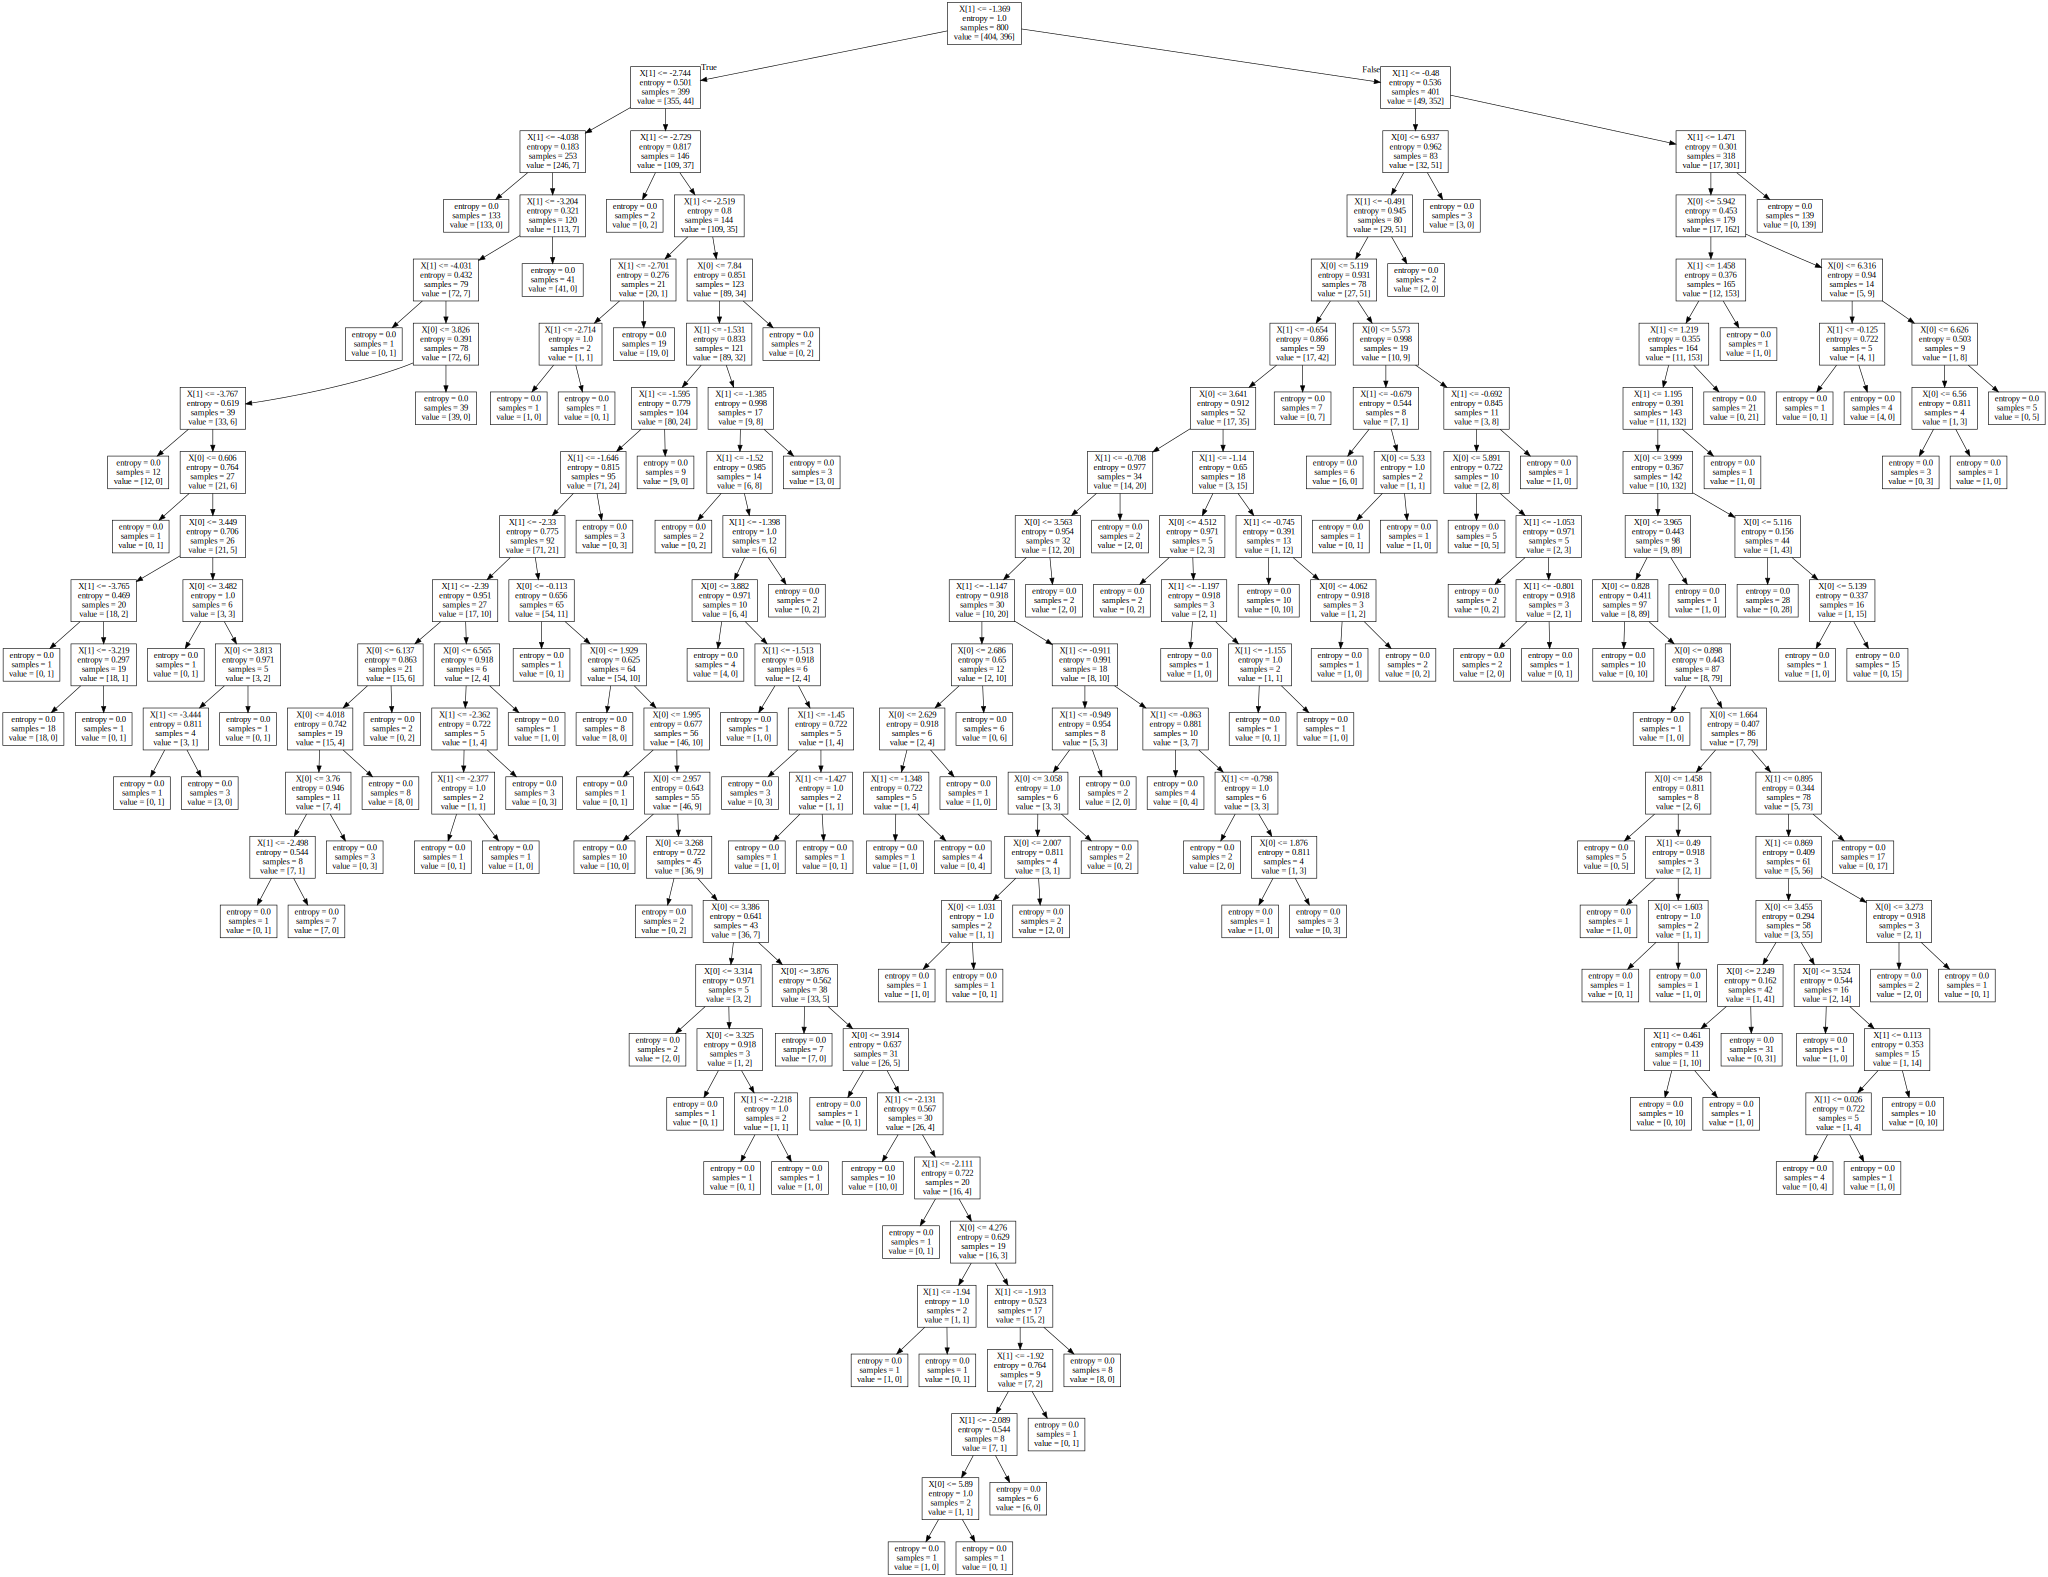

In [27]:
dot_data3 = tree.export_graphviz(clf3, out_file=None)
graph3 = graphviz.Source(dot_data3)  
graph3 


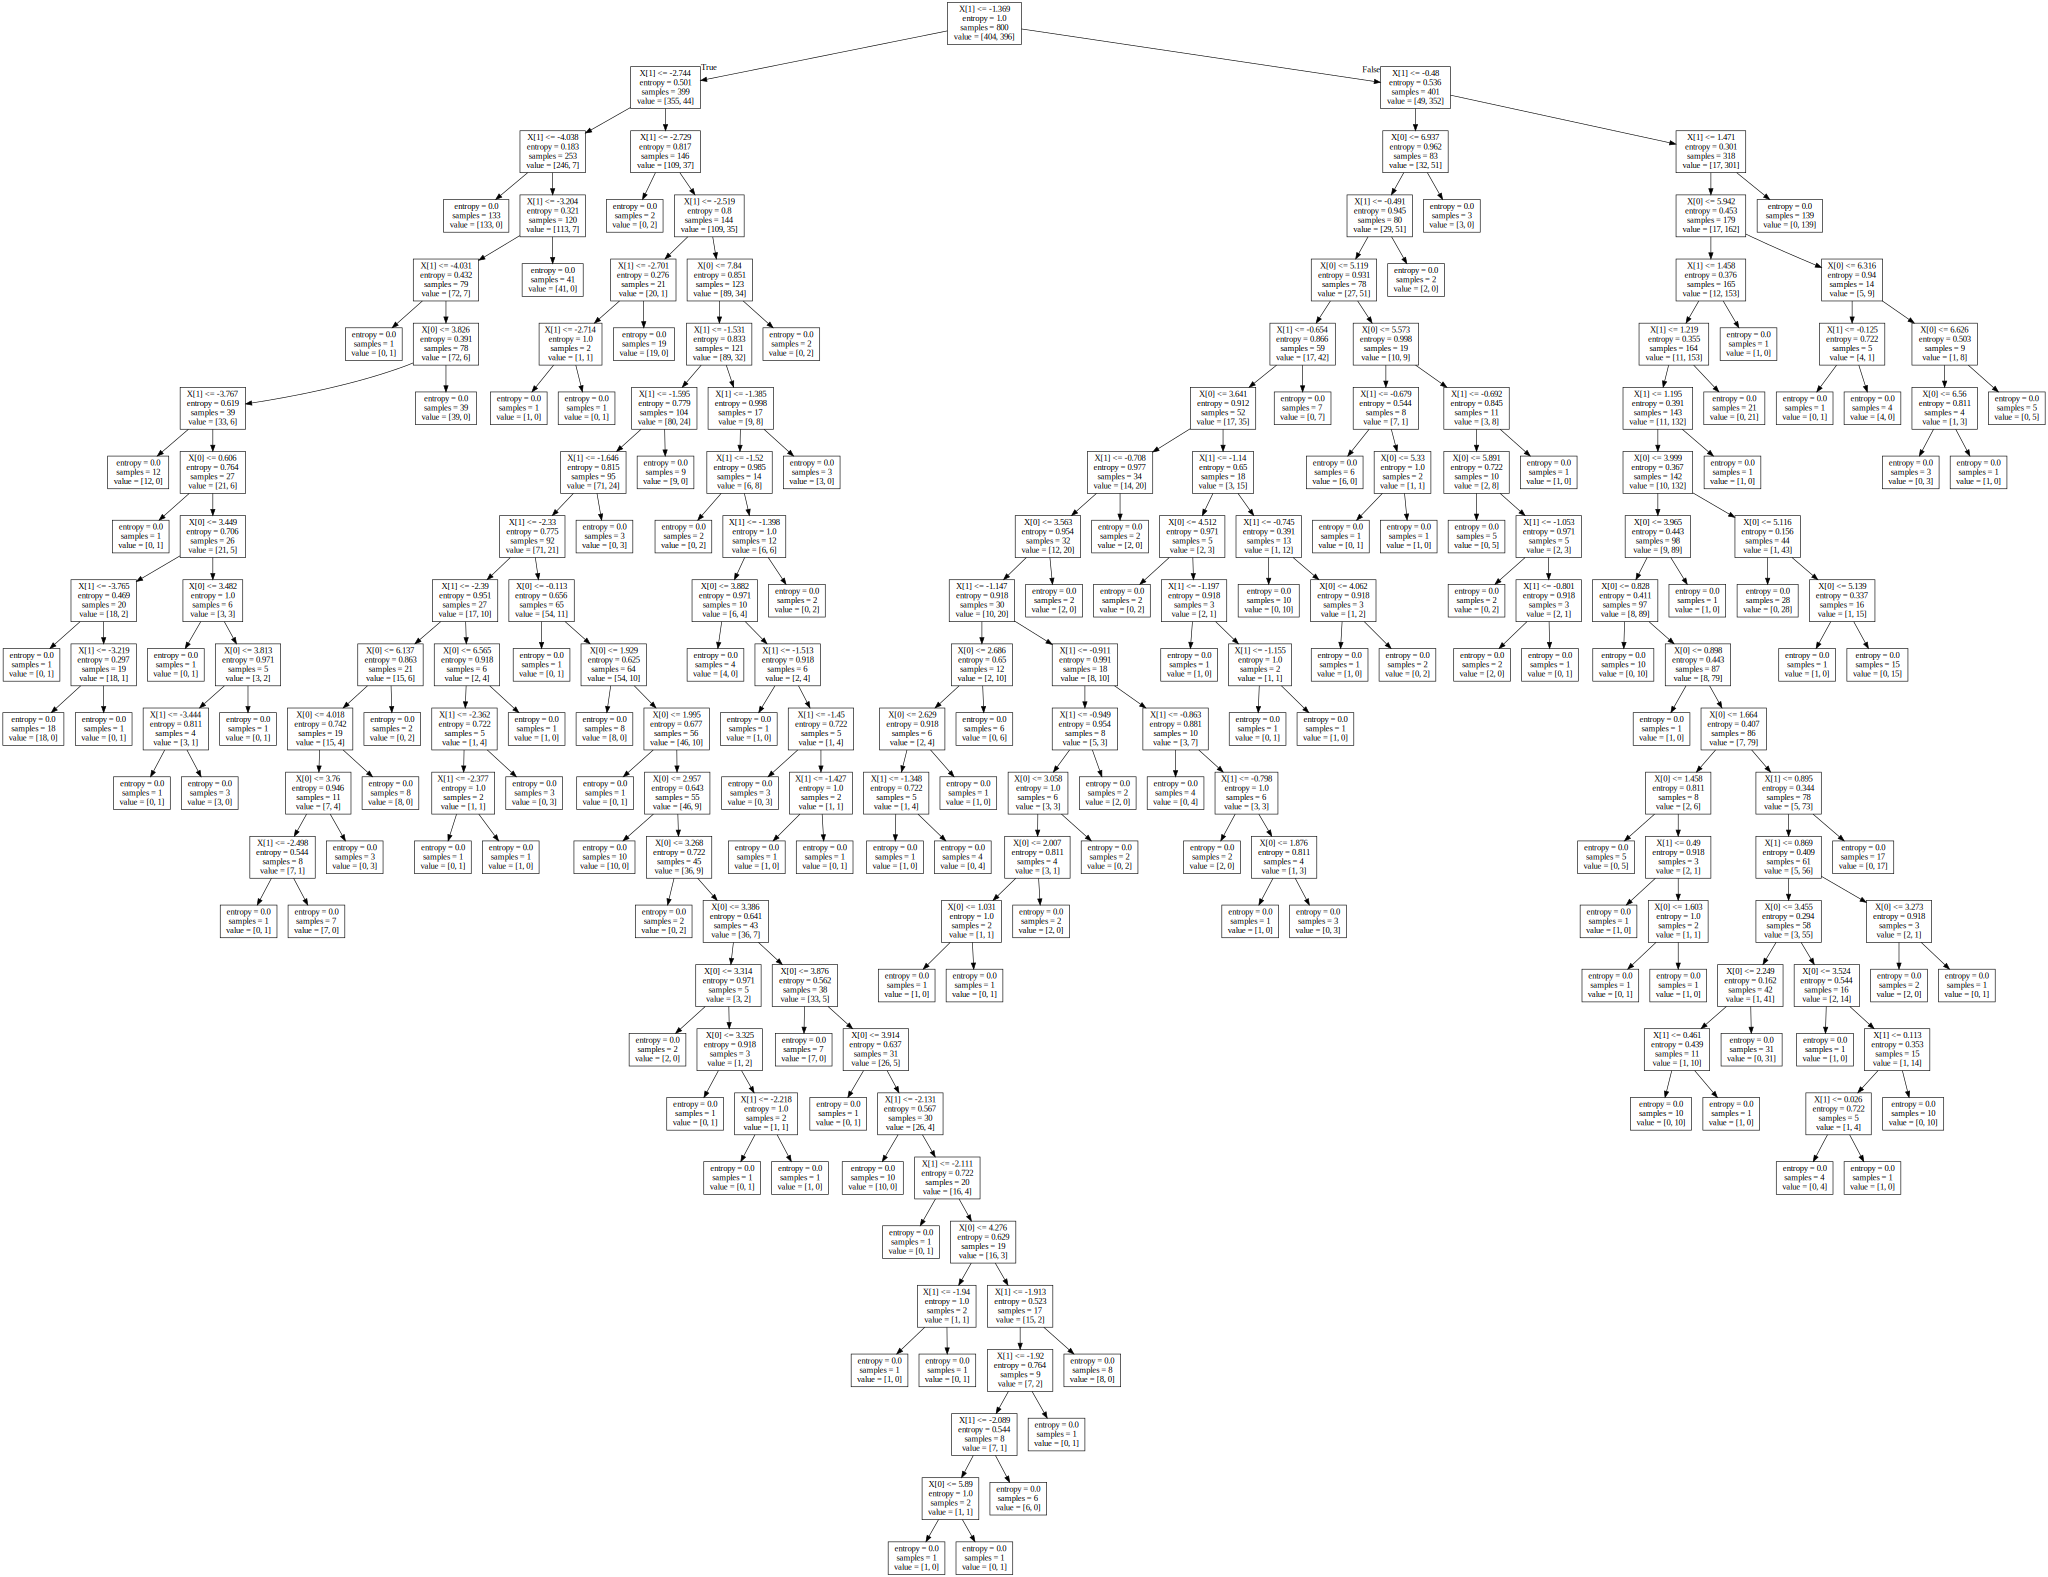

In [28]:
# This tree got *huge* -- and accuracy dropped a lot.

dot_data2 = tree.export_graphviz(clf2, out_file=None)
graph2 = graphviz.Source(dot_data2)  
graph2 

In [29]:
# Ok, I read on the internet that sometimes it's easy to overfit a model. Let's try max-depth = 3 for this tree.
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)
# fit the model clf using the training data
clf2 = clf.fit(X2_train, y2_train)
y2_pred = clf2.predict(X2_test)

In [30]:
metrics.accuracy_score(y2_test, y2_pred, normalize=True, sample_weight=None)
# Look at that: setting max depth to 3 magically makes this a lot more accurate.

0.8875

This is a bizarre result if you don't have a lot of experience with decision trees and other algorithms. Making my model less complex, more easily explained, and more robust actually increased my accuracy on the test set. This is a radical difference: look at the model for dataset 2 now:

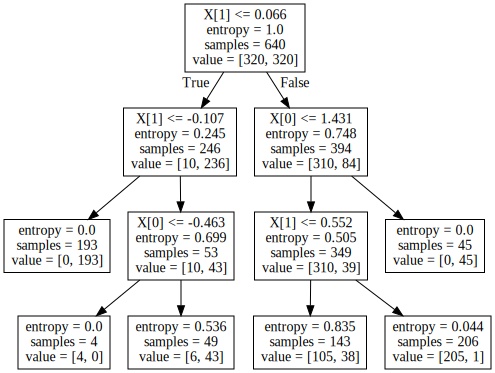

In [31]:

dot_data2 = tree.export_graphviz(clf2, out_file=None)
graph2 = graphviz.Source(dot_data2)  
graph2 

As you can see, there are definitely some errors -- but this is overall a fine decision tree.

## Training, validation, testing vs. k-fold cross-validation

These are two general ways to deal with overfitting: train-validation-test or k-fold cross validation. What's the difference? When should you do which?

If you want to know more, I recommend reading the "Model Assessment and Selection" chapter from Elements of Statistical Learning. It will tell you much more than random blog posts from Google's first page of results. 

Train-validation-test is useful for choosing between rival candidates for models. This could mean decision trees versus support vector machines, or it could just mean parameters for decision trees. Choosing the model you want to use is called "model selection".

Another goal is "model assessment": estimating the prediction error of the model chosen. The train-validate-test split is also useful for this -- but I'll leave that for another week! Hastie, Tibshirani, and Friedman, the authors of the book Elements of Statistical Learning, say that train-validate-test is the 'ideal' method for predicting error. However, there are many situations in which we don't have enough data to do it well. In these cases, k-fold cross validation is another powerful and popular way to estimate prediction error.

Let's concentrate for now on training, validation, and testing with decision trees.

So, above we proposed several models for decision trees. We tried both information gain and Gini impurity as ways of deciding on the optimal splits in our tree, and we set max depth 3 for one of the tree models. Let's use a three-way split of data to select the best model, with 60% of the data as training data, 20% for validation, and 20% for testing.

In [32]:
# Make a train-validation-test split using scikit-learn's train_test_split TWICE
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)
X2_train, X2_validate, y2_train, y2_validate = train_test_split(X2_train, y2_train, test_size=0.25)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2)
X3_train, X3_validate, y3_train, y3_validate = train_test_split(X3_train, y3_train, test_size=0.25)

In [33]:
dt_e = tree.DecisionTreeClassifier(criterion='entropy')
dt_g = tree.DecisionTreeClassifier(criterion='gini')
dt_e_max_depth_3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)
dt_g_max_depth_3 = tree.DecisionTreeClassifier(criterion='gini', max_depth = 3)
# fit the model clf using the training data



dt_g = dt_g.fit(X2_train, y2_train)
dt_e = dt_e.fit(X2_train, y2_train)
dt_g_max_depth_3 = dt_g_max_depth_3.fit(X2_train, y2_train)
dt_e_max_depth_3 = dt_e_max_depth_3.fit(X2_train, y2_train)

In [34]:
# fit the model clf using the training data
y2_g_val = dt_g.predict(X2_validate)
y2_e_val = dt_e.predict(X2_validate)
y2_e_max_depth_3_val = dt_e_max_depth_3.predict(X2_validate)
y2_g_max_depth_3_val = dt_g_max_depth_3.predict(X2_validate)


In [35]:
# Test gini, no depth limit
metrics.accuracy_score(y2_validate, y2_g_val, normalize=True, sample_weight=None)

0.99375

In [36]:
# Test entropy, no depth limit
metrics.accuracy_score(y2_validate, y2_e_val, normalize=True, sample_weight=None)

0.99375

In [37]:
# Test entropy, depth limit 3
metrics.accuracy_score(y2_validate, y2_e_max_depth_3_val, normalize=True, sample_weight=None)

0.95

In [38]:
# Test gini, depth limit 3
metrics.accuracy_score(y2_validate, y2_g_max_depth_3_val, normalize=True, sample_weight=None)

0.91875

In [39]:
# Select the model that performed best *for you*. I don't know what results you got, as I deleted the random seeds 
# in the train, test, validation split above!
# for the split I used, I got entropy as best once, gini as best once.
y2_e_test = dt_e.predict(X2_test)

In [40]:
# test the selected model
metrics.accuracy_score(y2_test, y2_e_test, normalize=True, sample_weight=None)

0.99375

So on the mysteryclassification2 dataset, we trained four models, we used outcomes on the validation set to select a model, and we tested the selected model. Now, depending on your randomization, you may have gotten a different result than I did. How did it perform?

Exercises: do this for mystery dataset 3, or mystery data set 1!


## Scikit-learn datasets

Scikit-learn has built-in datasets. You should know that they exist, because they're great practice data.

Here, let's do the classification of breast cancer tumors into benign and malignant based on clinical observations. 

In [41]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
# The 'targets' of the data are the outcomes; the targets are 0 or 1 as this is a binary classification set.
cancer.target[[233]]


array([0])

In [62]:
# How big is this set?
np.shape(cancer.data)

(569, 30)

In [42]:
# The names of the outcomes are 'malignant' and 'benign'. Here's a list:
list(cancer.target_names)

['malignant', 'benign']

In [50]:
# Here are the feature names:
list(cancer.feature_names)
# If you want a more compact output, use print(data.feature_names) instead.

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [51]:
# You can also look at the DESCR (description) for more info:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [52]:
# You can look at the data itself by using .data on the name of the dataset:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [53]:
# Let's do a 60-20-20 split on the data: so take 20% to be test set
# then take 25% of remainder for validation
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.20, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [54]:
# Let's make a list of the accuracy on the validation set, 
# and use accuracy on the validation set to choose the depth of our decision tree.
validation_accuracy = []

max_depth = range(1,10)

for depth in max_depth:
    dtc = tree.DecisionTreeClassifier(max_depth=depth,random_state=234)
    dtc = dtc.fit(X_train,y_train)
    y_pred = dtc.predict(X_val)
    validation_accuracy.append(metrics.accuracy_score(y_pred, y_val))

print(validation_accuracy)

[0.9078014184397163, 0.8723404255319149, 0.8794326241134752, 0.9078014184397163, 0.9078014184397163, 0.9078014184397163, 0.9078014184397163, 0.9078014184397163, 0.9078014184397163]


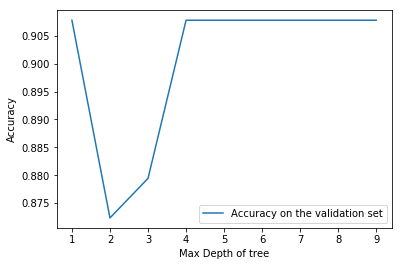

In [48]:

plt.plot(max_depth,validation_accuracy, label='Accuracy on the validation set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth of tree')
plt.legend()


Looks like both maximum tree depths of 3 and 5 do better than higher or lower depths, at least on the validation set. Huh! (If you get a different result, it may be because of a different random seed. I know some people will get depth 3 is best.)

So we'll select the depth-five tree, since that's what I got the best accuracy on for validation, and we'll test it.

In [49]:
dtc = tree.DecisionTreeClassifier(max_depth=3,random_state=234)
dtc = dtc.fit(X_train,y_train)
y_pred_test = dtc.predict(X_test)
metrics.accuracy_score(y_pred_test, y_test)

0.9020979020979021

I actually get a very good accuracy score here! Great!